In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regression with one variable

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

### Visualise the data

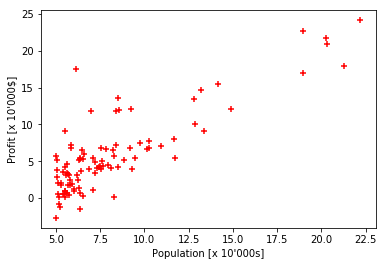

In [3]:
plt.scatter(data[:,0], data[:,1], marker='+', color ='r')
plt.xlabel('Population [x 10\'000s]')
plt.ylabel('Profit [x 10\'000$]')
plt.show()

### Linear model, cost function and gradient descent

In [4]:
X = np.transpose(np.array( [data[:,0]] ))
X = np.insert(X, 0, 1, axis=1)
y = np.transpose(np.array( [data[:,1]] ))

In [5]:
def linear_func(t, x):
    # return.shape = (m,1)
    return np.dot(x,t)

In [6]:
def cost_func(t, x, y):  
    # t.shape = (2,1)
    # x.shape = (m, 2)
    # y.shape = (m, 1)    
    return float( 1./(2*len(y)) * np.dot( (linear_func(t,x) - y).T, linear_func(t,x) - y))

Cross check: cost function for theta inizialized to zero

In [7]:
print cost_func(np.zeros((2,1)),X,y)

32.0727338775


In [8]:
def gradient_descent(x, y, alpha, iteration):
    
    t = np.zeros(( x.shape[1],1))
    
    cost_history = []
    
    for i in xrange(iteration):
    
        #print t, cost_func(t,x,y)
    
        cost_history.append( cost_func(t,x,y) )
    
        t = t - alpha * 1./(2*len(y)) * np.dot( (linear_func(t,x) - y).T, x ).T
    
    return t, cost_history
    

In [9]:
iteration = 1500
alpha = 0.02
theta, cost = gradient_descent(X,y,alpha,iteration)
print "Model parameter at minimum: (%.2f , %.2f)" % (theta[0], theta[1])

Model parameter at minimum: (-3.63 , 1.17)


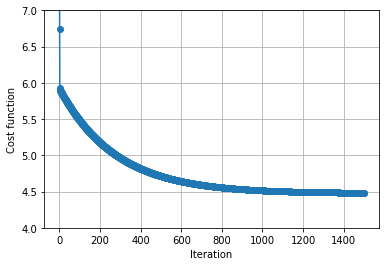

In [10]:
plt.plot(cost, marker='o')
plt.ylim(4,7)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.show()

In [11]:
print "Profit pediction for 35'000 people: %d $" % (1.0e4*float(linear_func(theta, [[1,3.5]])))
print "Profit pediction for 70'000 people: %d $" % (1.0e4*float(linear_func(theta, [[1,7]])))

Profit pediction for 35'000 people: 4519 $
Profit pediction for 70'000 people: 45342 $


### Visualise data with best model

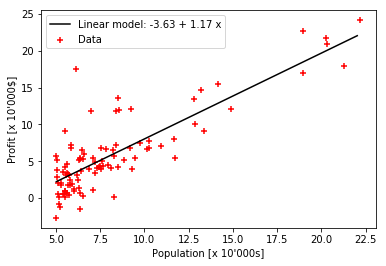

In [12]:
X_test = np.transpose(np.array([np.arange( np.min(data[:,0]), np.max(data[:,0]))]))
X_test = np.insert(X_test, 0, 1, axis=1)

plt.scatter(data[:,0], data[:,1], marker='+', color ='r', label='Data')
plt.plot( X_test[:,1], linear_func(theta, X_test), color='k', label='Linear model: %.2f + %.2f x' % (theta[0],theta[1]))
plt.xlabel('Population [x 10\'000s]')
plt.ylabel('Profit [x 10\'000$]')
plt.legend()
plt.show()

### Visualise cost function vs model parameters

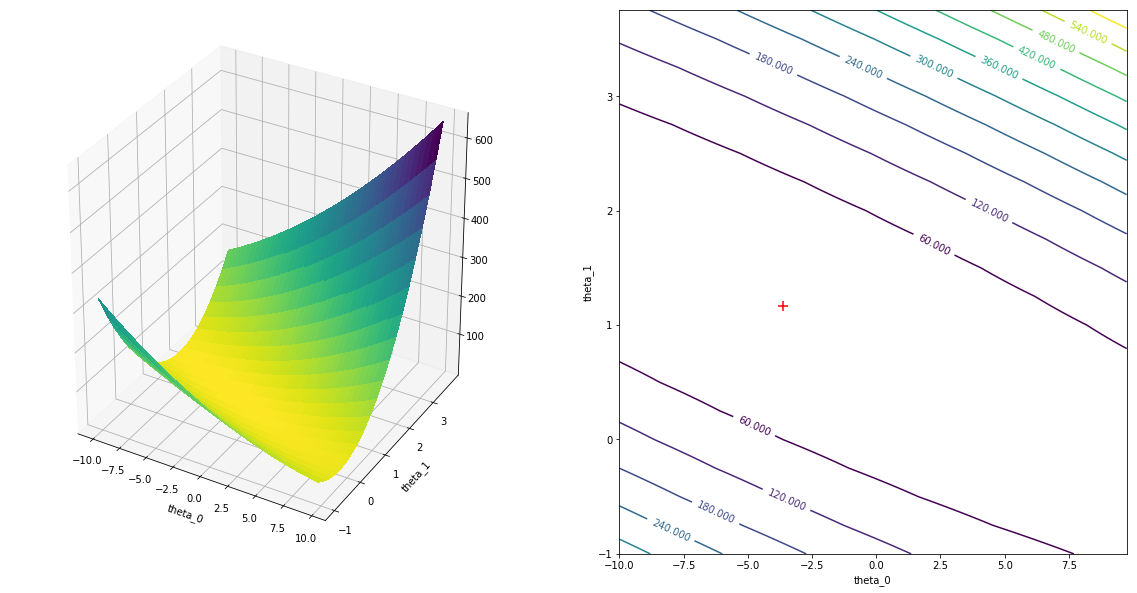

In [13]:
t0 = np.arange(-10, 10, 0.25)
t1 = np.arange(-1, 4, 0.25)
t0, t1 = np.meshgrid(t0, t1)

Z = np.array([ cost_func( np.array([[tt0],[tt1]]), X, y) for tt0,tt1 in zip(np.ravel(t0), np.ravel(t1))])
Z = Z.reshape(t0.shape)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure( figsize=(20,10) )
ax1 = fig.add_subplot(121, projection='3d')
# Plot the surface.
surf = ax1.plot_surface(t0, t1, Z, cmap=plt.get_cmap('viridis_r'),
                       linewidth=0, antialiased=False)
plt.xlabel('theta_0')
plt.ylabel('theta_1')

ax2 = fig.add_subplot(122)
cs = plt.contour(t0, t1, Z, 10)
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter( theta[0], theta[1], marker='+', color='r', s=100)
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.show()

### Validate model with scikit-learn linear regression implementation

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(data[:, np.newaxis, 0], data[:, np.newaxis, 1])
print "Scikit-learn parameter at minimum: (%.2f , %.2f)" % (float(regr.intercept_), float(regr.coef_))

Scikit-learn parameter at minimum: (-3.90 , 1.19)


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


# Linear regression with multiple variables

In [15]:
data2=np.loadtxt('data/ex1data2.txt', delimiter=',', unpack=True)
X = np.transpose(np.array( data2[:-1] ))
y = np.transpose(np.array( data2[-1:] ))

### Visualize the data 

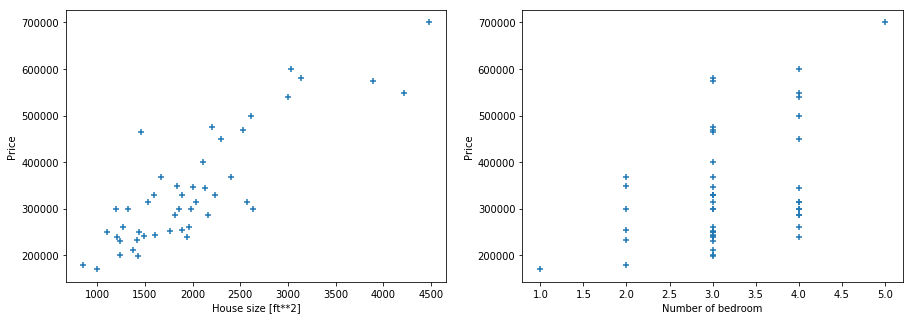

In [16]:
fig=plt.figure( figsize=(15,5))
fig.add_subplot(121)
plt.scatter(X[:,0],y, marker='+')
plt.xlabel('House size [ft**2]')
plt.ylabel('Price')
fig.add_subplot(122)
plt.scatter(X[:,1],y, marker='+')
plt.xlabel('Number of bedroom')
plt.ylabel('Price')
plt.show()

### Normalize features and visualize

In [17]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

In [18]:
# normalise the features
Xn = np.divide(X - np.mean(X, axis=0), np.std(X, axis=0))

# Add the columns of 1s for the biase
Xn = np.insert(Xn, 0, 1, axis=1)

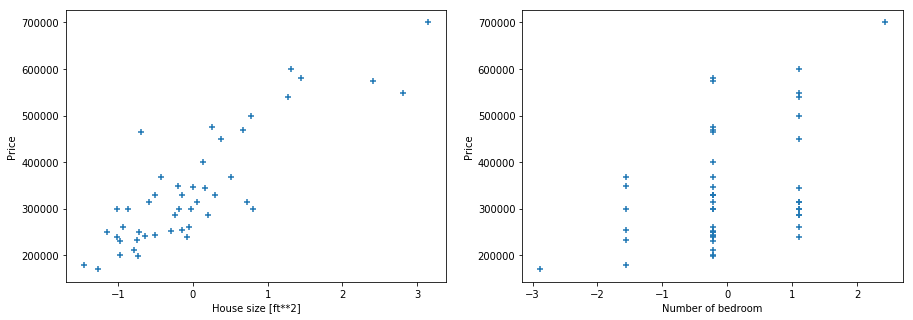

In [19]:
fig=plt.figure( figsize=(15,5))
fig.add_subplot(121)
plt.scatter(Xn[:,1],y, marker='+')
plt.xlabel('House size [ft**2]')
plt.ylabel('Price')
fig.add_subplot(122)
plt.scatter(Xn[:,2],y, marker='+')
plt.xlabel('Number of bedroom')
plt.ylabel('Price')
plt.show()

### Apply linear regression 

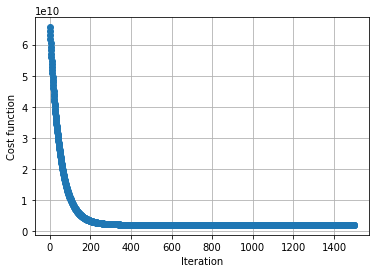

In [67]:
iteration = 1500
alpha = 0.02
theta, cost = gradient_descent(Xn,y,alpha,iteration)

plt.plot(cost, marker='o')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.show()

In [66]:
xx = [[1650, 3]]
xx_norm = np.divide(xx - means, stds)
xx_norm = np.insert(xx_norm, 0, 1, axis=1)

### Normal equation

In [60]:
XX = np.insert(X, 0, 1, axis=1)
theta_norm_eq = np.dot( np.dot( np.linalg.inv( np.dot(XX.T, XX)), XX.T), y)

### Validate model with scikit-learn linear regression implementation

In [61]:
# data2[:-1].shape : [2, n]
# data2[-1:].shape : [1, n]
# data2[:-1].T.shape : [n,2]
# data2[-1:].T.shape : [n,2]
# [n, n_feature], [n, n_target]
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit( data2[:-1].T , data2[-1:].T ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model parameters comparison

In [65]:
print "Linear regression : (%.2f , %.2f, %.2f)" % (theta[0], 
                                                   theta[1], 
                                                   theta[2]) # Normalised features!!!

print "Normal equation   : (%.2f , %.2f, %.2f)" % (theta_norm_eq[0], 
                                                   theta_norm_eq[1], 
                                                   theta_norm_eq[2])

print "Scikit-learn      : (%.2f , %.2f, %.2f)" % (float(regr.intercept_), 
                                                   float(regr.coef_[:,0]),
                                                   float(regr.coef_[:,1]))

Linear regression : (340412.56 , 109370.06, -6500.62)
Normal equation   : (89597.91 , 139.21, -8738.02)
Scikit-learn      : (89597.91 , 139.21, -8738.02)


### Model predition comparison

In [63]:
x_pred = [1650,3]

print "House price prediction for %d sft with %d bedroom:" % (x_pred[0], x_pred[1])
print""

xx_norm = np.divide([x_pred] - means, stds)
xx_norm = np.insert(xx_norm, 0, 1, axis=1)
print "Linear regression : %d $" % float(linear_func(theta, xx_norm))
print "Normal equation   : %d $" % float(linear_func(theta_norm_eq, np.insert( [x_pred], 0, 1, axis=1)))
print "Scikit-learn      : %d $" % regr.predict([x_pred])

House price prediction for 1650 sft with 3 bedroom:

Linear regression : 293098 $
Normal equation   : 293081 $
Scikit-learn      : 293081 $
